In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Mimization

Create a python Function called Func_1(x) $= (x^4-61x^3+1160x^2-7100x+6.e3)*e^{(-\frac{x}{10.})}$

In [3]:
Func_1= lambda x: (x**4 - 61*x**3 + 1160*x**2 - 7100*x + 6.e3)*np.exp(-x/10)

Define x as an array with lineary spaced values in the range [0,50)

In [4]:
x_array = np.arange(0,50,0.1)

plot Func_1(x) in the range [0,50]

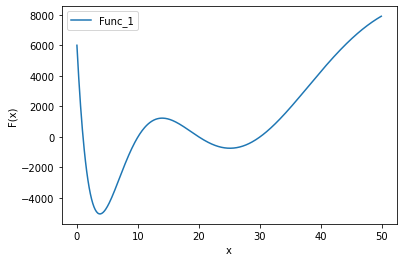

In [5]:
plt.plot(x_array, Func_1(x_array), label="Func_1")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.show()

Now we will try to find the minimum. Graphically determines the (approximated) miminimum:

How many minima ?
ANSWER : 2


What are the approximate values ?
ANSWSER: minimums at x=3.7 and x=25


Now we will try to find the minima using the 3 points bissection bracketing rule $[x_1, x_2,x_3]$, so that $F(x_2)< F(x_1)$ and $F(x_2)<F(x_3)$ so that we are sure a minimum exists between $x_1$ and $x_3$.


Write a python function, called " Minim_Func_1 ", that finds the minimum of function Func_1(x), starting from a triplet (x1,x2,x3) defined as above.

Your code must:

* take x1,x2,X3 as an arguement as well as:  $\epsilon$, the desired accuracy
* check first that $F(x_2)< F(x_1)$ and $F(x_2)<F(x_3)$
* iterate to find the minimum 
* Make sure than no more than Nitermax(=1000) iterations are done.

The function must return three number :

The value of the found minimum, the accuracy, the number of steps.







1st method : The new point to consider will be the center  of the largest segment.


In [6]:
def Minim_Func_1(x1,x2,x3, eps,f):
    if f(x2) > f(x1) or f(x2) > f(x3): #This conditions guaranties that there exists a minimum in the interval
        return "No minimum exists between this points"
    a = x1
    b = x2 
    c = x3
    x = 0
    iter = 0
    for i in range(999):
        if abs(a-b)<=eps:
            break
        L_ab =(a)*(b)
        L_cb = (b)*(c)
        if L_ab < L_cb:
            x = (a+b)/2
            if f(b)<f(x):
                a=x
            else:
                c=b
                b=x
        else: 
            x = (b+c)/2
            if f(b)<f(x):
                c = x
            else: 
                a=b
                b=x
        iter = i
                
    return {'minimum':x, 'steps':iter, 'accuracy':abs((a)-(b))}
    

In [7]:
Minim_Func_1(0.e0,5.e0,10.e0, 1.e-6,Func_1)
#Accoding to Wolfram Mathematica, the minimum is at 3.774, so our solution is accurate enough 

{'minimum': 3.7499994039535522, 'steps': 22, 'accuracy': 5.960464477539062e-07}

Plot the number of iterations needed to get an accuracy , abs(x3-x1) , of 0.01, 0.001, 1.e-3,1.e-4, 1.e-5,1.e-6)



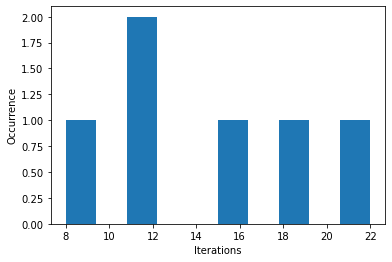

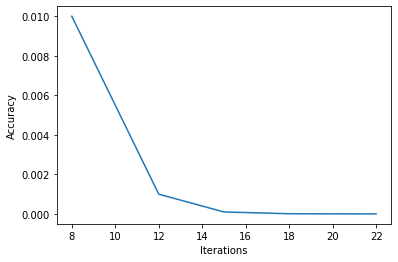

In [8]:
results = []
accuracies = [0.01,0.001,1.e-3,1.e-4,1.e-5,1.e-6]
for item in accuracies:
    results += [Minim_Func_1(0.e0,5.e0,10.e0, item,Func_1)['steps']]

plt.hist(results)
plt.xlabel('Iterations')
plt.ylabel('Occurrence')
plt.show()
plt.plot(results,accuracies)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()


Plot the  accuracy of the solution  as a function of the number of iterations. You can use the python matplotlib funcion : plt.semilogy for plotting with a logarithmic Y scale.

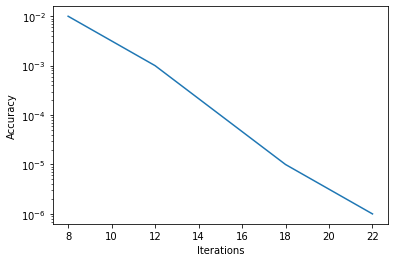

In [9]:
plt.semilogy(results,accuracies)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

In [10]:
#Same for golden rule 
def golden_rule(x1,x2,x3, eps,f):
    if f(x2) > f(x1) or f(x2) > f(x3): #This conditions guaranties that there exists a minimum in the interval
        return "No minimum exists between this points"
    a = x1
    b = x2 
    c = x3
    x = 0
    iter = 0
    R= 0.38197
    for i in range(999):
        if abs(a-b)<=eps:
            break
        distance_1 = abs(a-b)
        distance_2 = abs(c-b)

        if distance_1 > distance_2:
            x = a+R*distance_1
            if f(x)<f(b):
                c = b
                b = x
            else:   
                a = x
        else: 
            x = b + R*distance_2
            if f(x)<f(b):
                a=b
                b=x
            else: 
                c = x
        
        iter = i

    return {'minimum':x, 'steps':iter, 'accuracy':abs((a)-(b))}

golden_rule(0.e0,5.e0,10.e0, 1.e-6,Func_1)
    
    


{'minimum': 3.7747070606671107, 'steps': 40, 'accuracy': 6.344048695261506e-07}

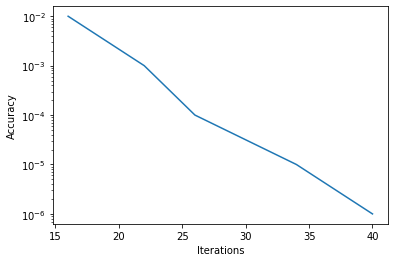

In [11]:
results = []
accuracies = [0.01,0.001,1.e-3,1.e-4,1.e-5,1.e-6]
for item in accuracies:
    results += [golden_rule(0.e0,5.e0,10.e0, item,Func_1)['steps']]

plt.semilogy(results,accuracies)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

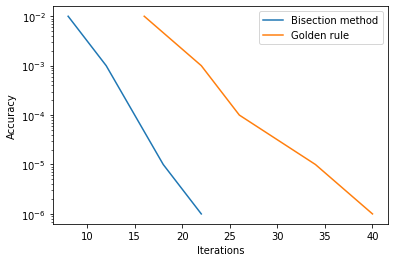

In [12]:
#Comparison with bisection method

results = []
results_2 = []
accuracies = [0.01,0.001,1.e-3,1.e-4,1.e-5,1.e-6]
for item in accuracies:
    results += [Minim_Func_1(0.e0,5.e0,10.e0, item,Func_1)['steps']]
    results_2 += [golden_rule(0.e0,5.e0,10.e0, item,Func_1)['steps']]

plt.semilogy(results,accuracies, label="Bisection method")
plt.semilogy(results_2,accuracies, label="Golden rule")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Bisection seems to be faster than golden rule for same function 

Do not be surprised if the golden rule is not systematically better than bissection !!!!


## A superlinear method.

We use [x1,x2,x3] as usual to bracket the minimum, but now point x4 will be the chose as the minimum of the parabola that passes through the 3 points [x1,x2,x3] with values [f(x1),f(x2),fx(3)] 
Note :The  the minimum of the parabola that passes trhough the 3 points f(a),f(b),fx(c) is located at abscissa X such that =

$
X=b-0.5\frac{(b-a)^2(f(b)-f(c))-(b-c)^2(f(b)-f(a))}{(b-a)(f(b)-f(c))-(b-c)(f(b)-f(a))}
$

Build a minimisation function called : Minim_Parab_Func_1 that search for the minimum using parabolic descent.

Note 1: for the method to be more efficient than bissection you must make sure at each time step that the new interval has a width smaller than 0.5 of the previoux step.
So a good way to do that is to compute X4 using the formula above (X=) that is the best guess for the next minimum and take the smallest segment that brackets the minimum wihin points [x1,x2,x3,x4,0.5*(x1+x3)].



For this we can use the two following methods :
* np.sort(S), that sort in ascending order a list of values contained in a list S
* V.argmin() that returns the index of the smallest element in a array (numpy array) V.
* to transform a list in a numpy array you can use : np.array(L) where L is a list.
Example : L=[1,2,3] is a list and np.array(L) returns an array with the same elements as in L


To check that your minimization process is performing well,  I suggest that at each step you print x1,x2,x3 to check that everything is occuring properly.


In [13]:
def parabolic_fit(a,b,c,fa,fb,fc):
    numerator = (b-a)**2 * (fb-fc) - (b-c)**2*(fb-fa)
    denominator = (b-a)*(fb-fc) - (b-c)*(fb-fa)
    return b-0.5*numerator/denominator


def Minim_Parab_Func_1(x1,x2,x3, eps,f):
    if f(x2) > f(x1) or f(x2) > f(x3): #This conditions guaranties that there exists a minimum in the interval
        return "No minimum exists between this points"
    a = x1
    b = x2 
    c = x3
    x = 0
    iter = 0
    for i in range(999):
        if abs(a-b)<=eps:
            break
        L_ab =(a)*(b)
        L_cb = (b)*(c)
        if L_ab < L_cb:
            x = (a+b)/2
            if f(b)<f(x):
                a=x
            else:
                c=b
                b=x
        else: 
            x = (b+c)/2
            if f(b)<f(x):
                c = x
            else: 
                a=b
                b=x
        x4 = parabolic_fit(a,b,c,f(a),f(b),f(c))
        if (f(x4)<f(b)):
            c=b
            b=x4
        else: 
            a=x4
        
        iter = i
        
    return {'minimum':x, 'steps':iter, 'accuracy':abs((a)-(b))}
    

    

Test the convergence speed of the parabolic descent rule, and display  a same graph as before. Show that the parabolic method converges much more rapidly than previous method

In [14]:
Minim_Parab_Func_1(0.e0,5.e0,10.e0, 1.e-10,Func_1)


{'minimum': 3.7747076622291917, 'steps': 11, 'accuracy': 6.693179344097189e-11}

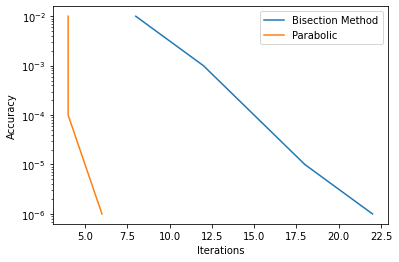

In [15]:
results = []
results_2 = []
accuracies = [0.01,0.001,1.e-3,1.e-4,1.e-5,1.e-6]
for item in accuracies:
    results += [Minim_Func_1(0.e0,5.e0,10.e0, item,Func_1)['steps']]
    results_2 += [Minim_Parab_Func_1(0.e0,5.e0,10.e0, item,Func_1)['steps']]

plt.semilogy(results,accuracies, label="Bisection Method")
plt.semilogy(results_2,accuracies, label="Parabolic")
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()


PLot the accuracy of the result, as a function of the number of iterations for the bissection, the golden rule and for the superlinear method.

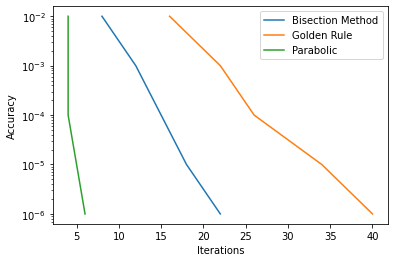

In [16]:
results = []
results_2 = []
results_3 = []
accuracies = [0.01,0.001,1.e-3,1.e-4,1.e-5,1.e-6]
for item in accuracies:
    results += [Minim_Func_1(0.e0,5.e0,10.e0, item,Func_1)['steps']]
    results_2 += [golden_rule(0.e0,5.e0,10.e0, item,Func_1)['steps']]
    results_3 += [Minim_Parab_Func_1(0.e0,5.e0,10.e0, item,Func_1)['steps']]

plt.semilogy(results,accuracies, label="Bisection Method")
plt.semilogy(results_2,accuracies, label="Golden Rule")
plt.semilogy(results_3,accuracies, label="Parabolic")
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

#Better approach is given by the superlinear method

# finding the minimum of an arbitrary function : passing a function name as an argument


Now we wish our previous minimization function to be able to minimize any function, and not only the function called "Func_1". So we need to pass the function name as an argument. This is very simple in Python: we can just use an argument called (for example) $func$ and when we call the minimization function,  just pass the name of this funcion (without ' or ") in the variable func.
* Define a python function called Func_2(x) that compute any function of x (for example $f(x)=x^6-x^3$, or anything else you wish)
* Define a python function called 'call_func(f)', that will return f(2) by calling : call_func(Func_2) 

Shows that it works by typing : call_func(Func_2) 

In [17]:
Func_2 = lambda x: x**6 - x**3

Finding a minimum :
    plot Func_2 within a range of values of your choice bracketing is a minimum (between 0 and 1 should be enough)

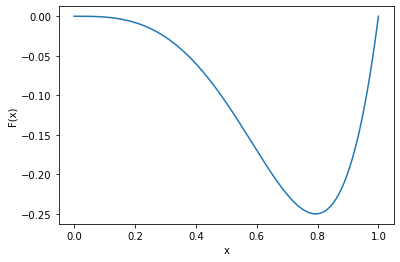

In [18]:
x_values = np.linspace(0,1,1000)
plt.plot(x_values, Func_2(x_values))
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

Build a minimization function of your choice that will accept [x1,x2,x3,Func_2] as an argument and that will find the minimum of Func_2 within [x1,x3]. Try to reuse what you have already coded above

In [19]:
Minim_Parab_Func_1(0,0.8,1,0.001,Func_2) #I could recycle my whole function as they already did what is requested for this exercise 
#According to Wolfram, the minimum is at 1/2^(1/3)≈0.7937, 

{'minimum': 0.7930912879566268, 'steps': 6, 'accuracy': 0.0006092379327775621}

# Fitting a model to data: Determining the elimination time of a medicine in the body


We try to determine how long it takes for a medecine to be eliminated from a human body (metabolisation or eliminationin urines). The medicine is injected in a subject, and measurements of the medicine concentration are done regularly during several days. The data are the following. t is the date of all measurements (in minutes, t=0 is the moment of the injection).


In [20]:
t=np.array([0, 1.27202491e+02, 3.14663948e+02, 4.47499292e+02,
       5.77904807e+02, 7.36644162e+02, 8.77944621e+02, 1.03429168e+03,
       1.18319505e+03, 1.33041427e+03, 1.48234442e+03, 1.64547130e+03,
       1.77172013e+03, 1.92313885e+03, 2.07086937e+03, 2.22777241e+03,
       2.37867541e+03, 2.50116573e+03, 2.65833952e+03, 2.82126398e+03,
       2.95786912e+03, 3.10040140e+03, 3.25340147e+03, 3.41529223e+03,
       3.53234880e+03, 3.68589222e+03, 3.85383279e+03, 3.99062701e+03,
       4.11829287e+03, 4.26010451e+03, 4.42751803e+03, 4.57595613e+03,
       4.73240964e+03, 4.87564297e+03, 5.02498239e+03, 5.16407107e+03,
       5.31320580e+03, 5.45634412e+03, 5.61789192e+03, 5.75401807e+03]
)

The corresponding measured concentration are the following (in arbirary units)

In [21]:
C=np.array([100.,  84.19752483,  79.43669653,  77.49545165,
        64.54338469,  45.67223012,  34.75582205,  36.55283011,
        41.88282264,  28.1426116 ,  21.06445026,  19.8784981 ,
        14.20655088,  13.00527066,  15.21292955,   9.48415543,
         7.86202904,   9.48789641,  12.26344071,   6.86855964,
        14.8847701 ,   0.        ,   9.94703693,   4.97773134,
         8.15232925,   4.48353225,   8.75568603,   1.12007805,
         8.0847839 ,   0.        ,   1.19374786,   0.        ,
        11.38141968,   0.        ,   5.42182953,   0.        ,
         1.69707766,  15.76470042,   3.25146039,   1.46703363])

Plot C(t) with xlabel "minutes" and ylabel "concentration"

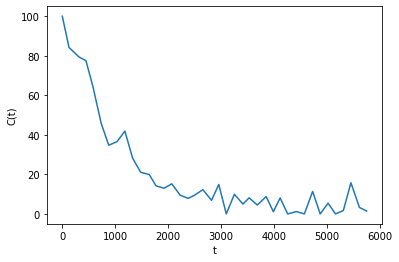

In [22]:
plt.plot(t,C)
plt.xlabel("t")
plt.ylabel("C(t)")
plt.show()

We assume now that C(t) can be given the form $C(t,\lambda)=100e^{-t/\lambda}$. We try to determine the value of $\lambda$ that best fits the function. In order to do this we will compare different functions (will different values of $\lambda$ with the observation). We define a function called $\chi(\lambda)$ that is a measure of the distance of a model to data. $\chi(\lambda)=\sum_{i=1}^{N} (C_{obs}(t_i)-C_{model}(t_i,\lambda))^2$. The best value of $\lambda$ is the one that minimizes  $\chi(\lambda)$.

* Write a function called $XHI(\lambda)$ that returns $\chi(\lambda)$


Using the functions you have defined above, find $\lambda$

note: So the first thing to do is do define a function, XHI(lambda) that returns 𝜒(𝜆)

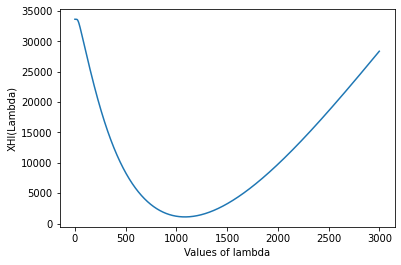

In [23]:
def XHI(x):
    values = (C - 100*np.exp(-t/x))**2
    return np.sum(values)
#We need to test multiple values of lambda such that minimices XHI
#Let's run XHI over an interval of 0.01, 10

values_test = np.arange(0.1,3000,0.5)
values_xhi = [XHI(i) for i in values_test]

#Let's plot this results

plt.plot(values_test, values_xhi)
plt.xlabel("Values of lambda")
plt.ylabel("XHI(Lambda)")
plt.show()

#Because we have a minimum, it's possible to use one of the methods we studied above, so we find a value for lambda. 

In [24]:
#To find the minimum we'll apply the parabolic method, as it's the most efficient we found. 
lambda_values = Minim_Parab_Func_1(1,1000, 2500,0.0001,XHI)
print("Lambda that minimizes the function =", lambda_values['minimum'])

Lambda that minimizes the function = 1084.1632865157508


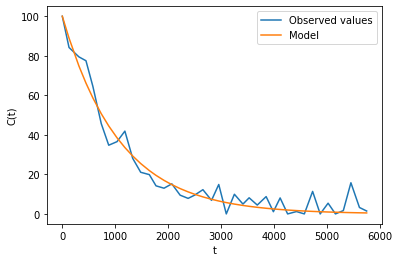

In [25]:
#Now, let's plot our functions and see if we have a good approximation 
Lambda_value = lambda_values['minimum']
function_approx_values = 100*np.exp(-t/Lambda_value)

plt.plot(t,C, label="Observed values")
plt.plot(t, function_approx_values, label= "Model")
plt.xlabel("t")
plt.ylabel("C(t)")
plt.legend()
plt.show()

So, we have that the model equation is given by: 

$C(t) = 100e^{-t/1084.16}$